In [1]:
# Enable autoloading for utils.py and convert.py
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import convert

In [3]:
# Change plot font size
import matplotlib
matplotlib.rc('font', size=12)
matplotlib.rcParams['figure.dpi']= 600

# Plot filter throughputs

In [4]:
def plot_bandpass(fig, ax, bandpass_name, spectrum=None):
    bandpass = utils.get_bandpass(bandpass_name)
    bandpass_label = utils.LABELMAP[bandpass_name]
    bandpass_color = utils.COLORMAP[bandpass_name]
    
    if spectrum is None:
        ax.plot(bandpass.wave, bandpass.throughput, c=bandpass_color, label=bandpass_label)
    else:
        observation = utils.S.Observation(spectrum, bandpass, force='extrap')
        ax.plot(observation.binwave, observation.binflux, c=bandpass_color, label=bandpass_label)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


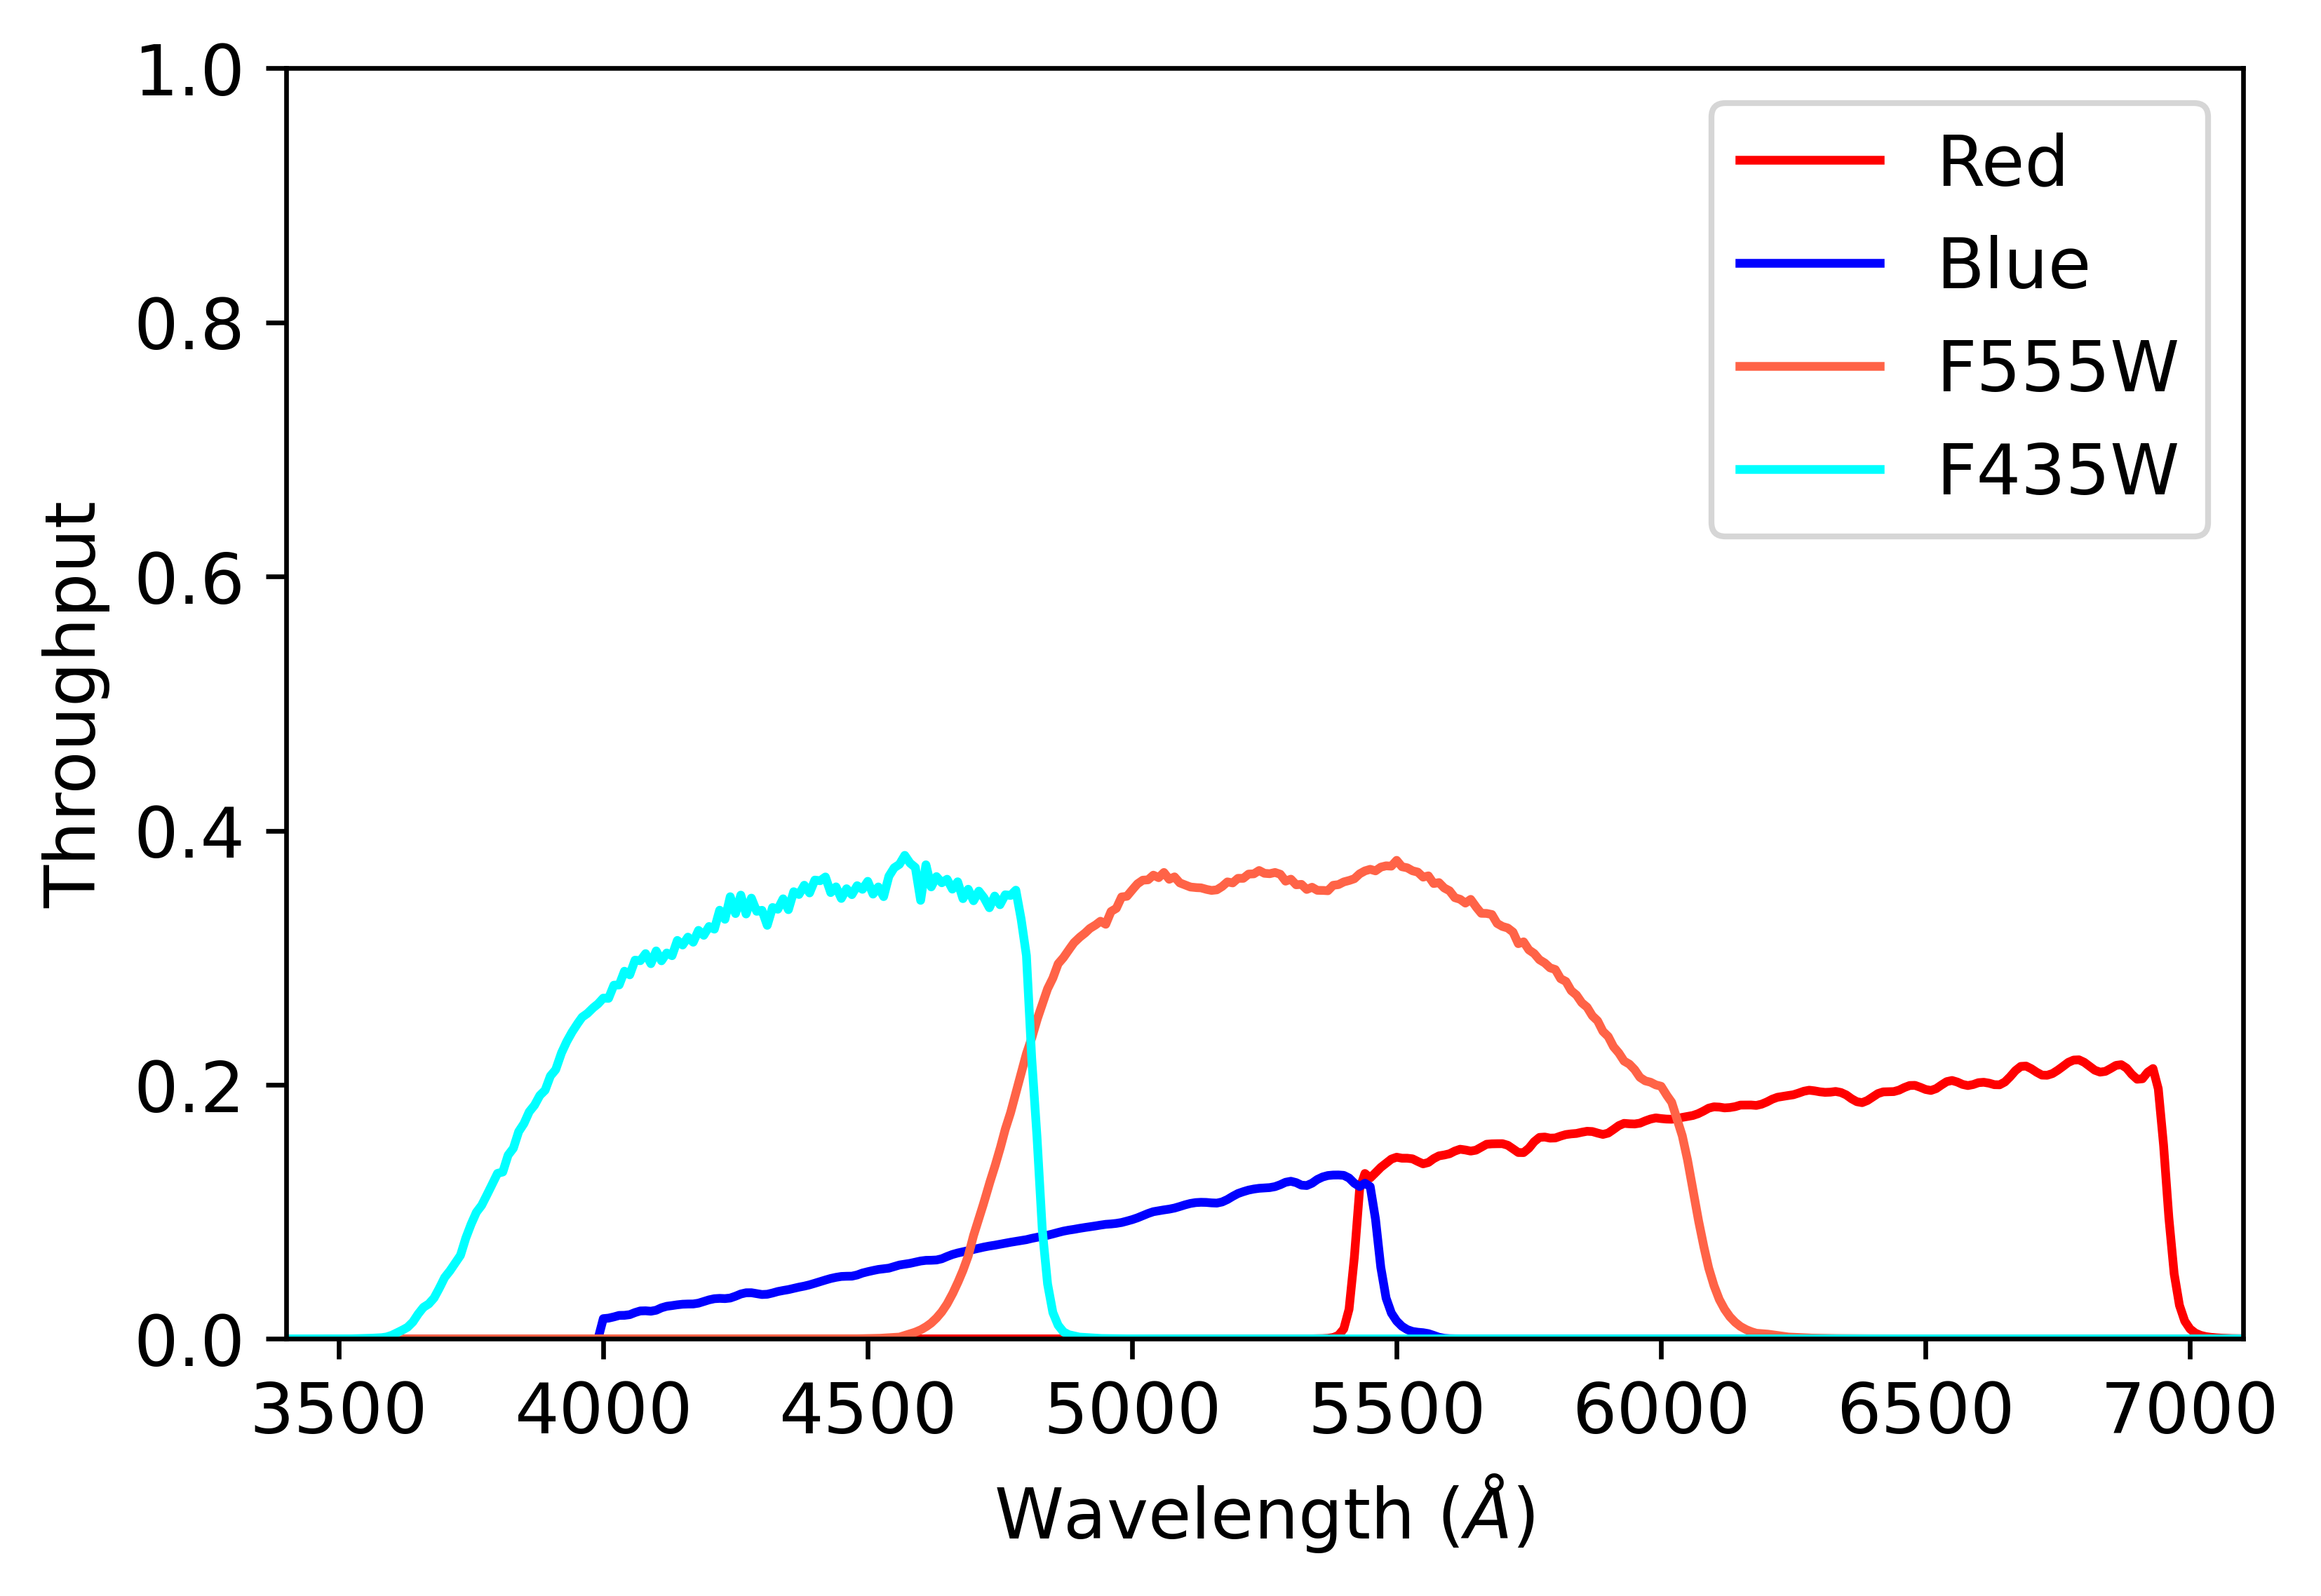

In [5]:
# Plot without spectrum

# Matplotlib setup
fig, ax = plt.subplots()

# Plot throughputs
bandpasses = ['NH_RED', 'NH_BLUE', 
              'HST_F555W', 'HST_F435W']
for bp in bandpasses:
    plot_bandpass(fig, ax, bp)
    


# Show plot
ax.set_xlabel(r"Wavelength ($\AA$)")
ax.set_ylabel(r"Throughput")

ax.set_xlim(3400, 7100)
ax.set_ylim(0, 1)

ax.legend()
plt.savefig("passband_nospec.eps")
plt.show()

(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_V) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_B) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


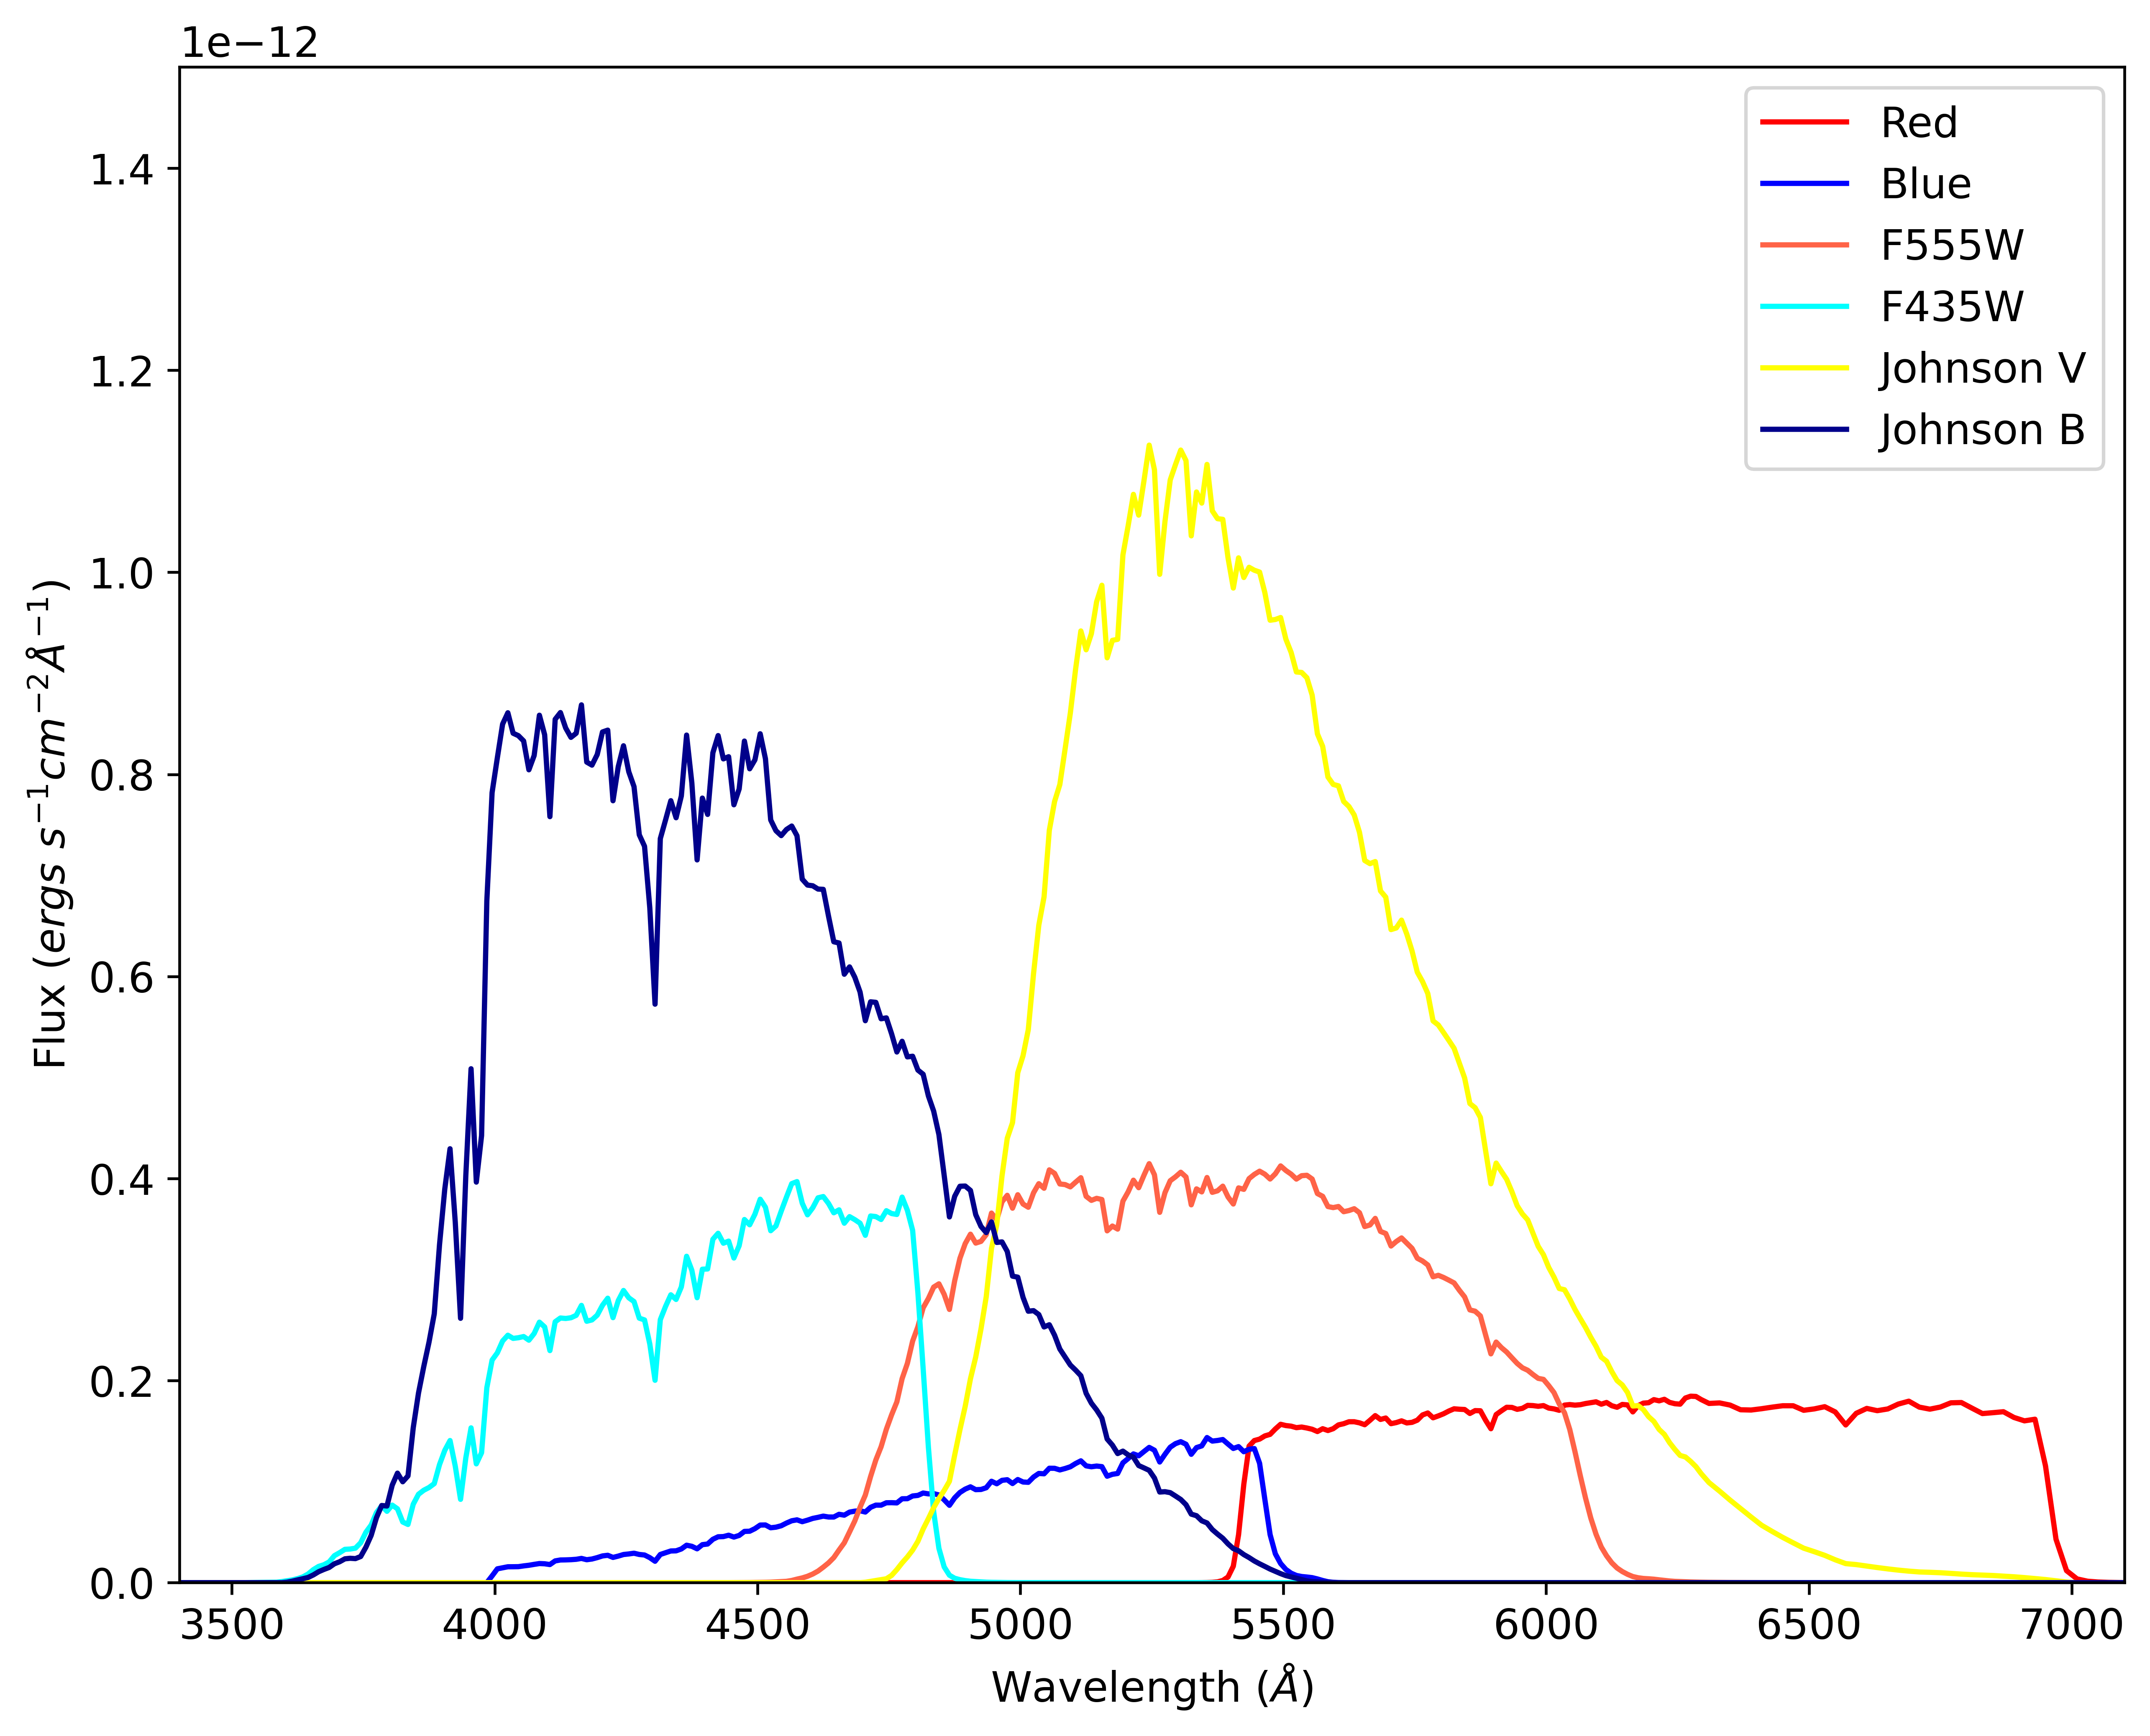

In [6]:
# Maybe split this into two plots?
# Plot with spectrum

# Matplotlib setup
fig, ax = plt.subplots(figsize=(10, 8))

# Plot throughputs
bandpasses = ['NH_RED', 'NH_BLUE', 
              'HST_F555W', 'HST_F435W',
              'JOHNSON_V', 'JOHNSON_B']
spectrum = utils.get_spectrum('pluto')
spectrum.convert('Angstrom')
spectrum.convert('flam')
for bp in bandpasses:
    plot_bandpass(fig, ax, bp, spectrum=spectrum)
    

# Show plot
# ax.set_ylim(0, 0.4)
ax.set_xlabel(r"Wavelength ($\AA$)")
ax.set_ylabel(
    r"Flux ($ergs\ s^{−1} cm^{−2} \AA^{−1}$)"
)

ax.set_xlim(3400, 7100)
ax.set_ylim(0, 15e-13)

ax.legend()
plt.savefig("passband_withspec.eps")
plt.show()

# Relative Contributions
In order to use the measurements from both the New Horizons Red and Blue filters, a method for combining and converting the measurements is required. For the F555W filter, the following process is used: (1) Each input filter (NH Red and NH Blue) is converted using the normal single-filter process; (2) correlation factors are computed between the input filters and the output filters; (3) the final result is computed as the average of the single-filter conversions weighted by the correlation factors. 

In [7]:
%%capture
table = convert.get_factor_table(
    ['pluto', 'charon', 'hd'],
    ['NH_RED', 'NH_BLUE'],
    ['HST_F555W', 'HST_F435W','JOHNSON_V', 'JOHNSON_B', 'JOHNSON_R'],
    float_format='%.4f',
    bold_rows=True, 
    multicolumn_format='c', # Center Spectrum Labels
    na_rep='', # Missing data is just blank
)
table2 = convert.get_single_spec_factor_table(
    'pluto',
    ['NH_RED', 'NH_BLUE', 'NH_NIR'],
    ['HST_F555W', 'HST_F435W','JOHNSON_V', 'JOHNSON_B', 'JOHNSON_R'],
    float_format='%.4f',
    bold_rows=True, 
    multicolumn_format='c', # Center Spectrum Labels
    na_rep='', # Missing data is just blank
)


In [8]:
print(table)

\begin{tabular}{lrrrrrr}
\toprule
\textbf{Target} & \multicolumn{2}{c}{Pluto} & \multicolumn{2}{c}{Charon} & \multicolumn{2}{c}{HD205905} \\
\textbf{Input Filter} &    Red &   Blue &    Red &   Blue &      Red &   Blue \\
\midrule
\textbf{F555W    } & 0.5479 & 0.4521 & 0.5237 & 0.4763 &   0.5388 & 0.4612 \\
\textbf{F435W    } & 0.0000 & 1.0000 &        & 1.0000 &          & 1.0000 \\
\textbf{Johnson V} & 0.5830 & 0.4170 & 0.5638 & 0.4362 &   0.5781 & 0.4219 \\
\textbf{Johnson B} & 0.0069 & 0.9931 & 0.0055 & 0.9945 &   0.0061 & 0.9939 \\
\textbf{Johnson R} & 0.9913 & 0.0087 & 0.9905 & 0.0095 &   0.9915 & 0.0085 \\
\bottomrule
\end{tabular}



# Plot Conversions

/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/scipy/io/idl.py:414: UserWarning: Skipping SYSTEM_VARIABLE record
  warnings.warn("Skipping SYSTEM_VARIABLE record")


(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F5

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F5

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


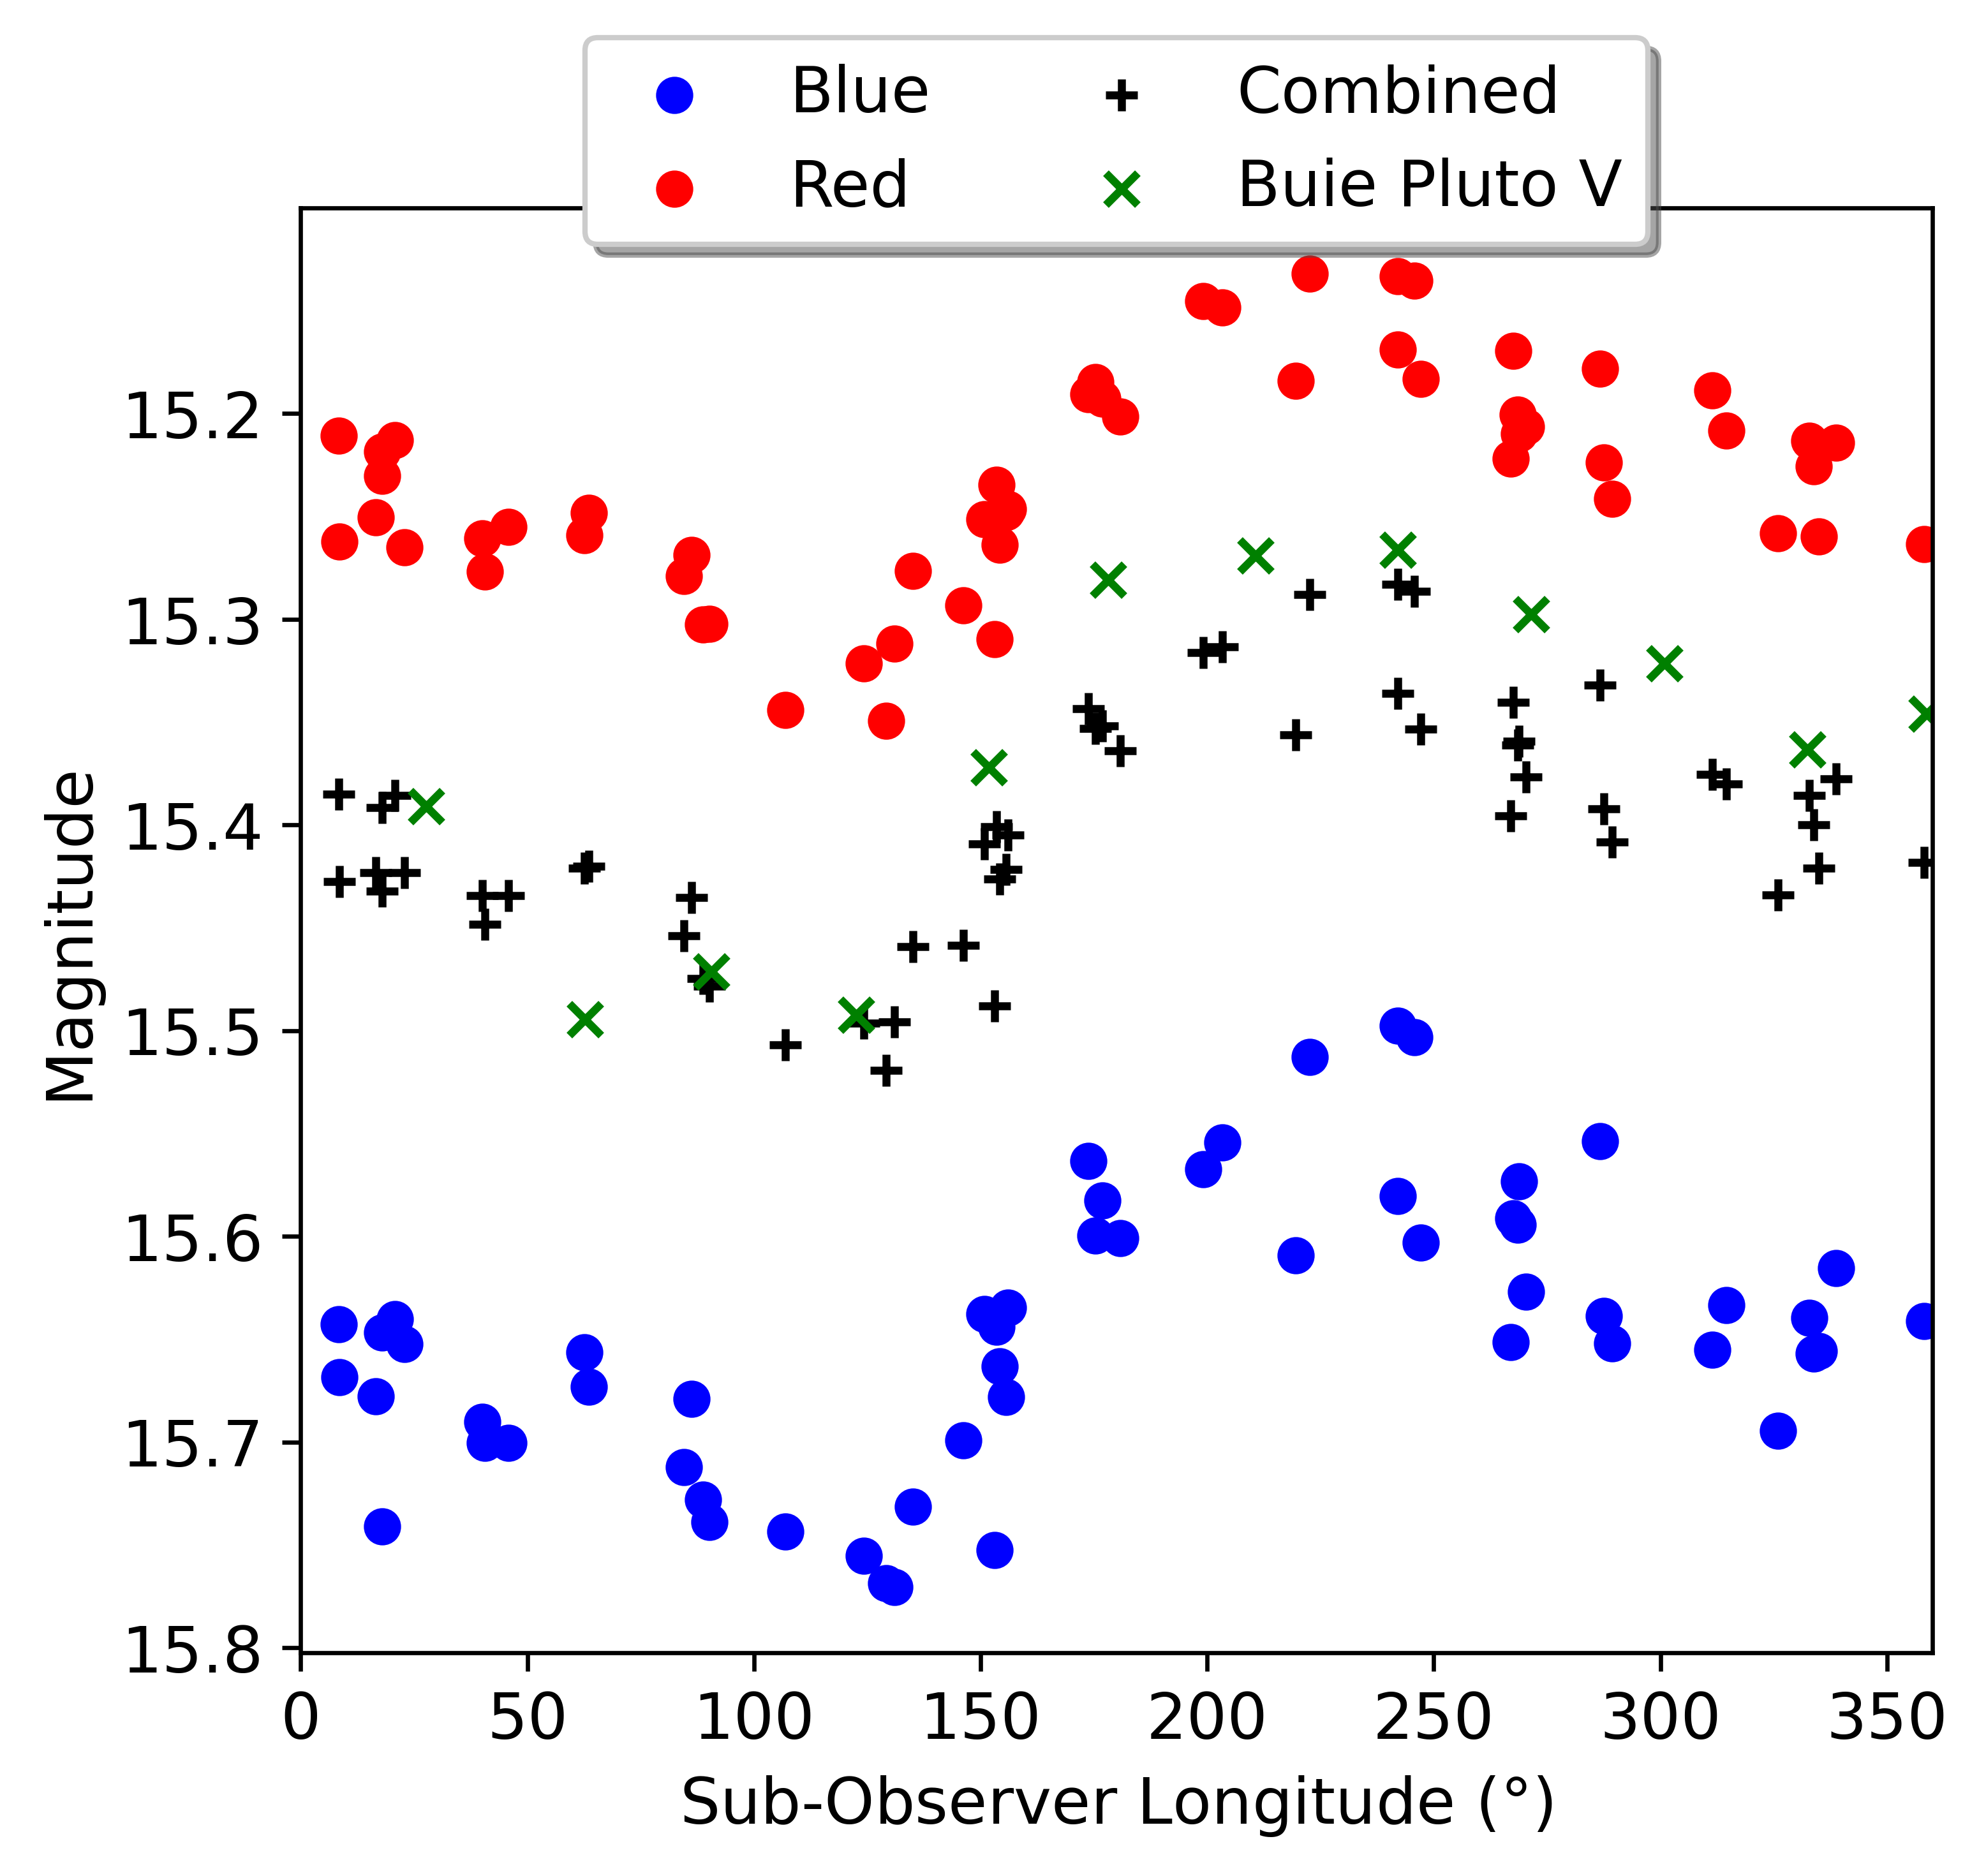

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of 

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F4

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

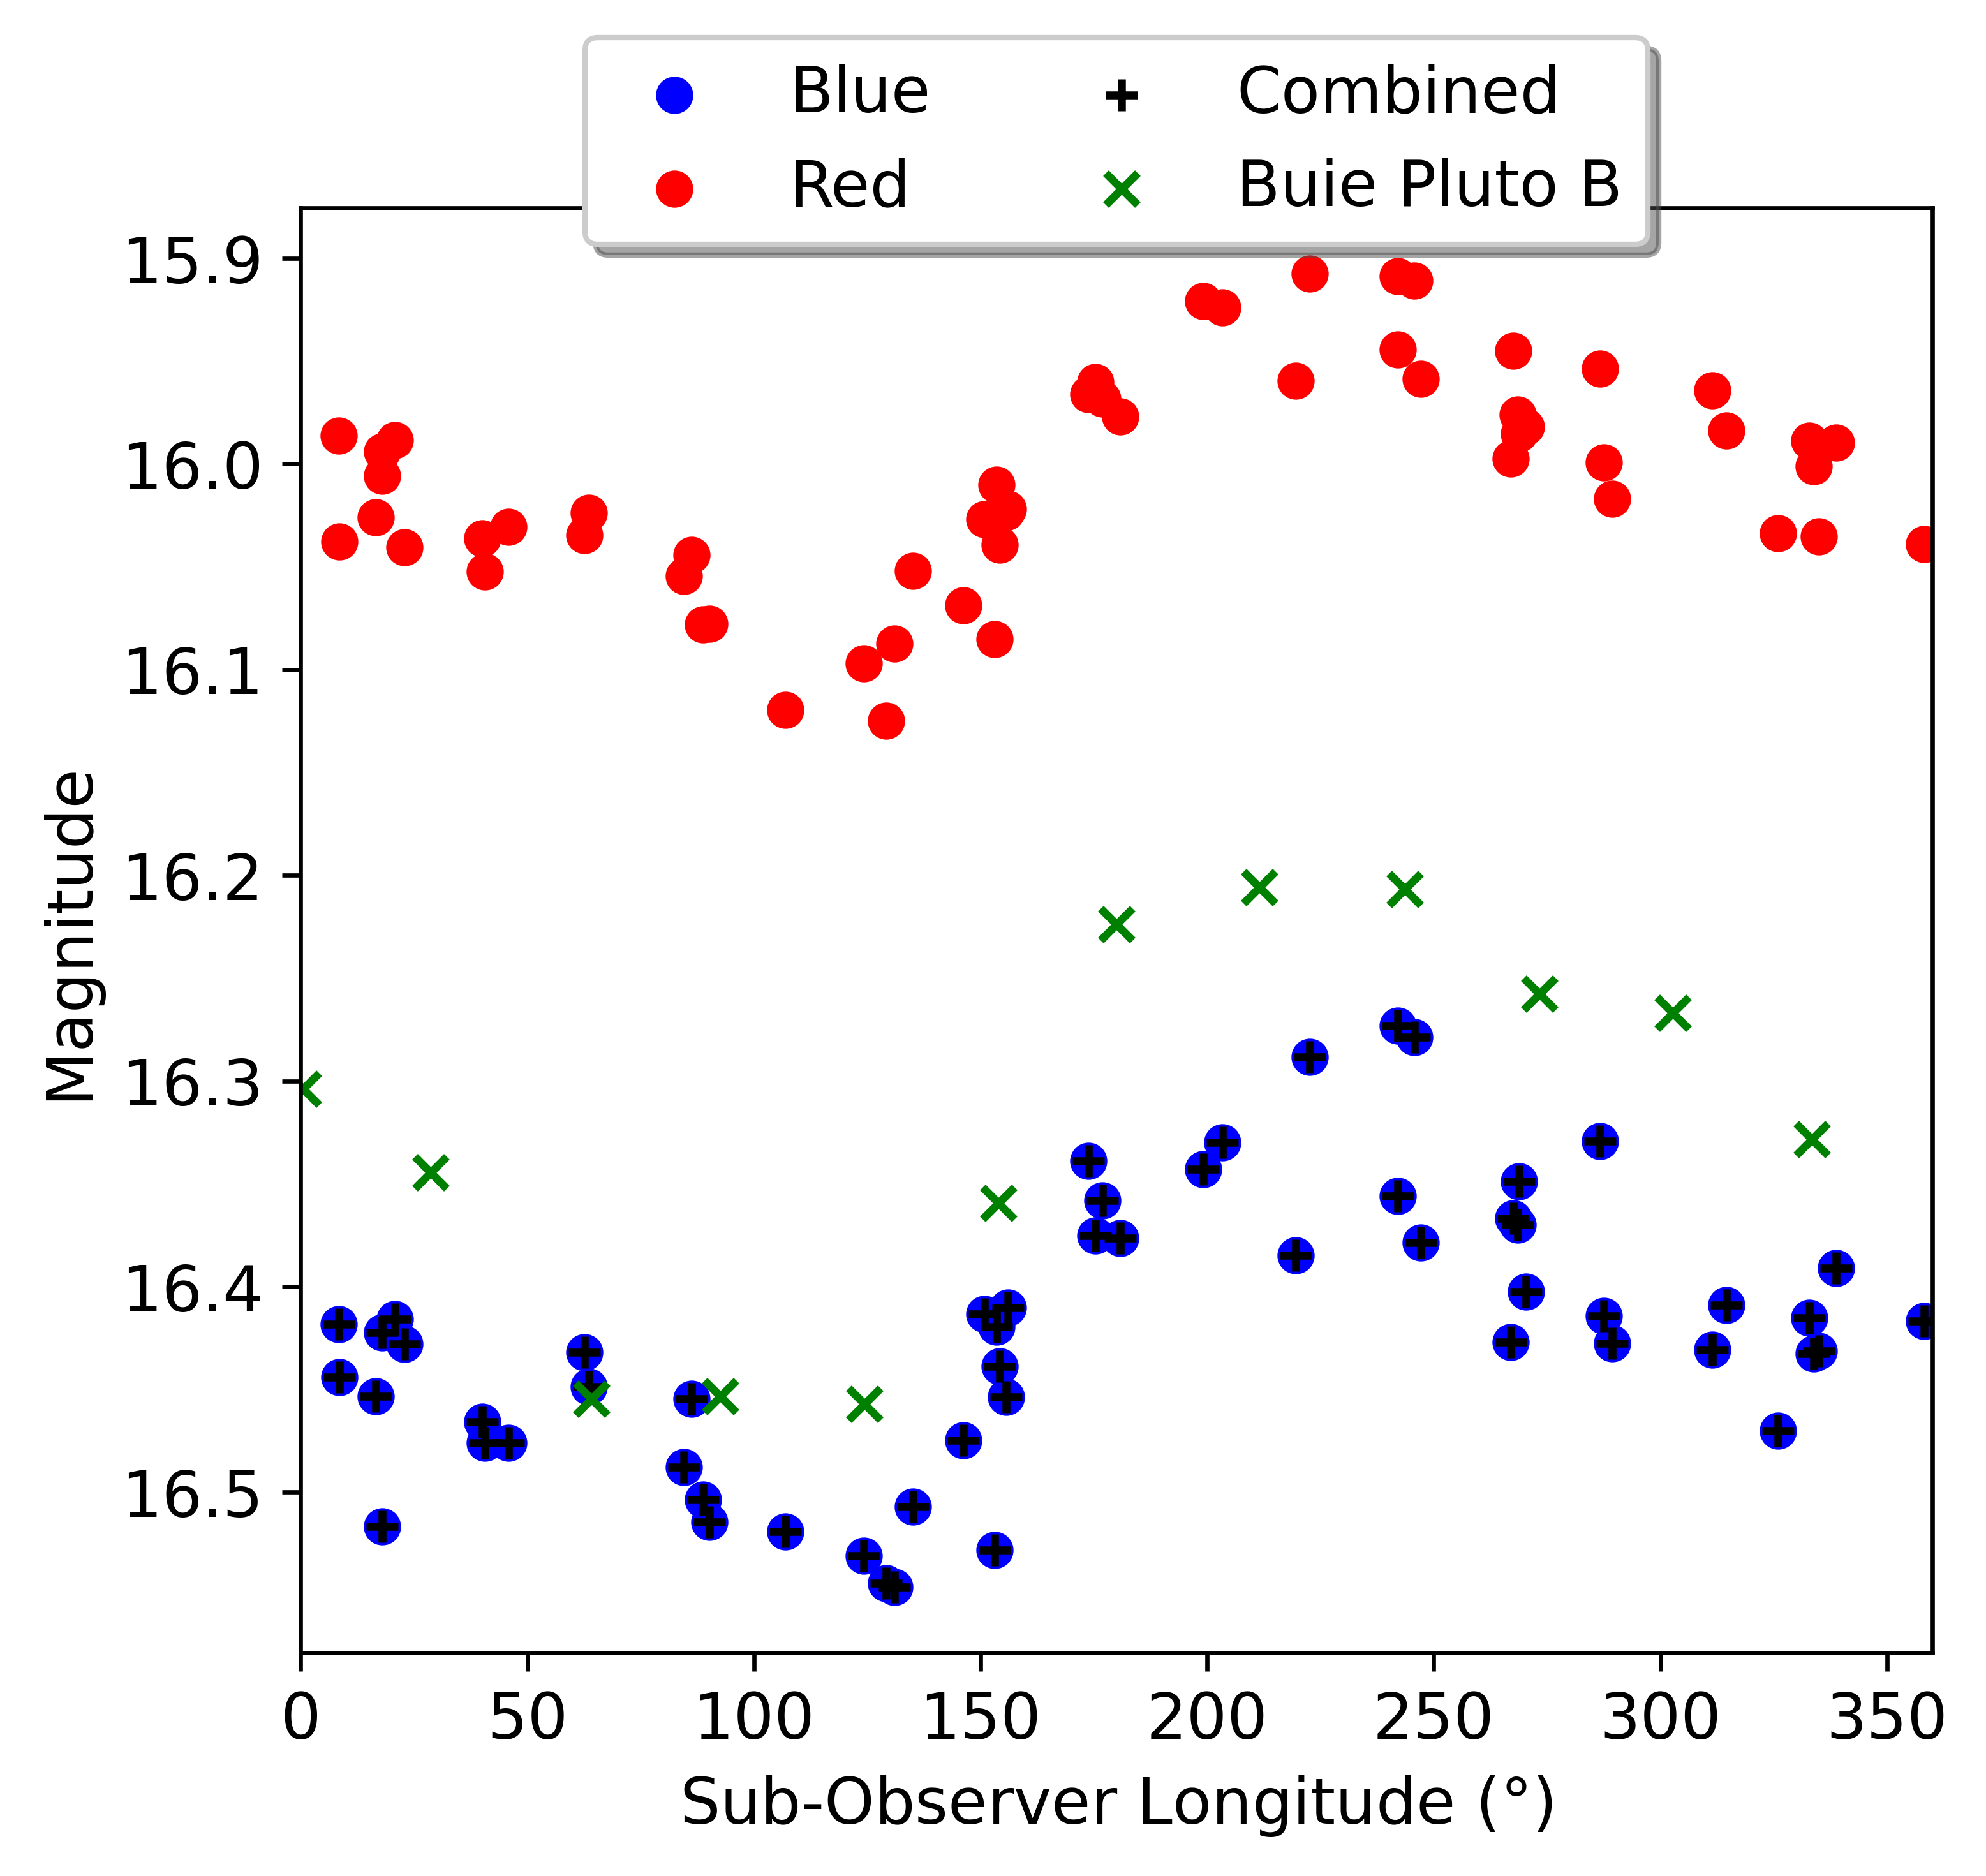

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F5

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F5

(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning,

(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


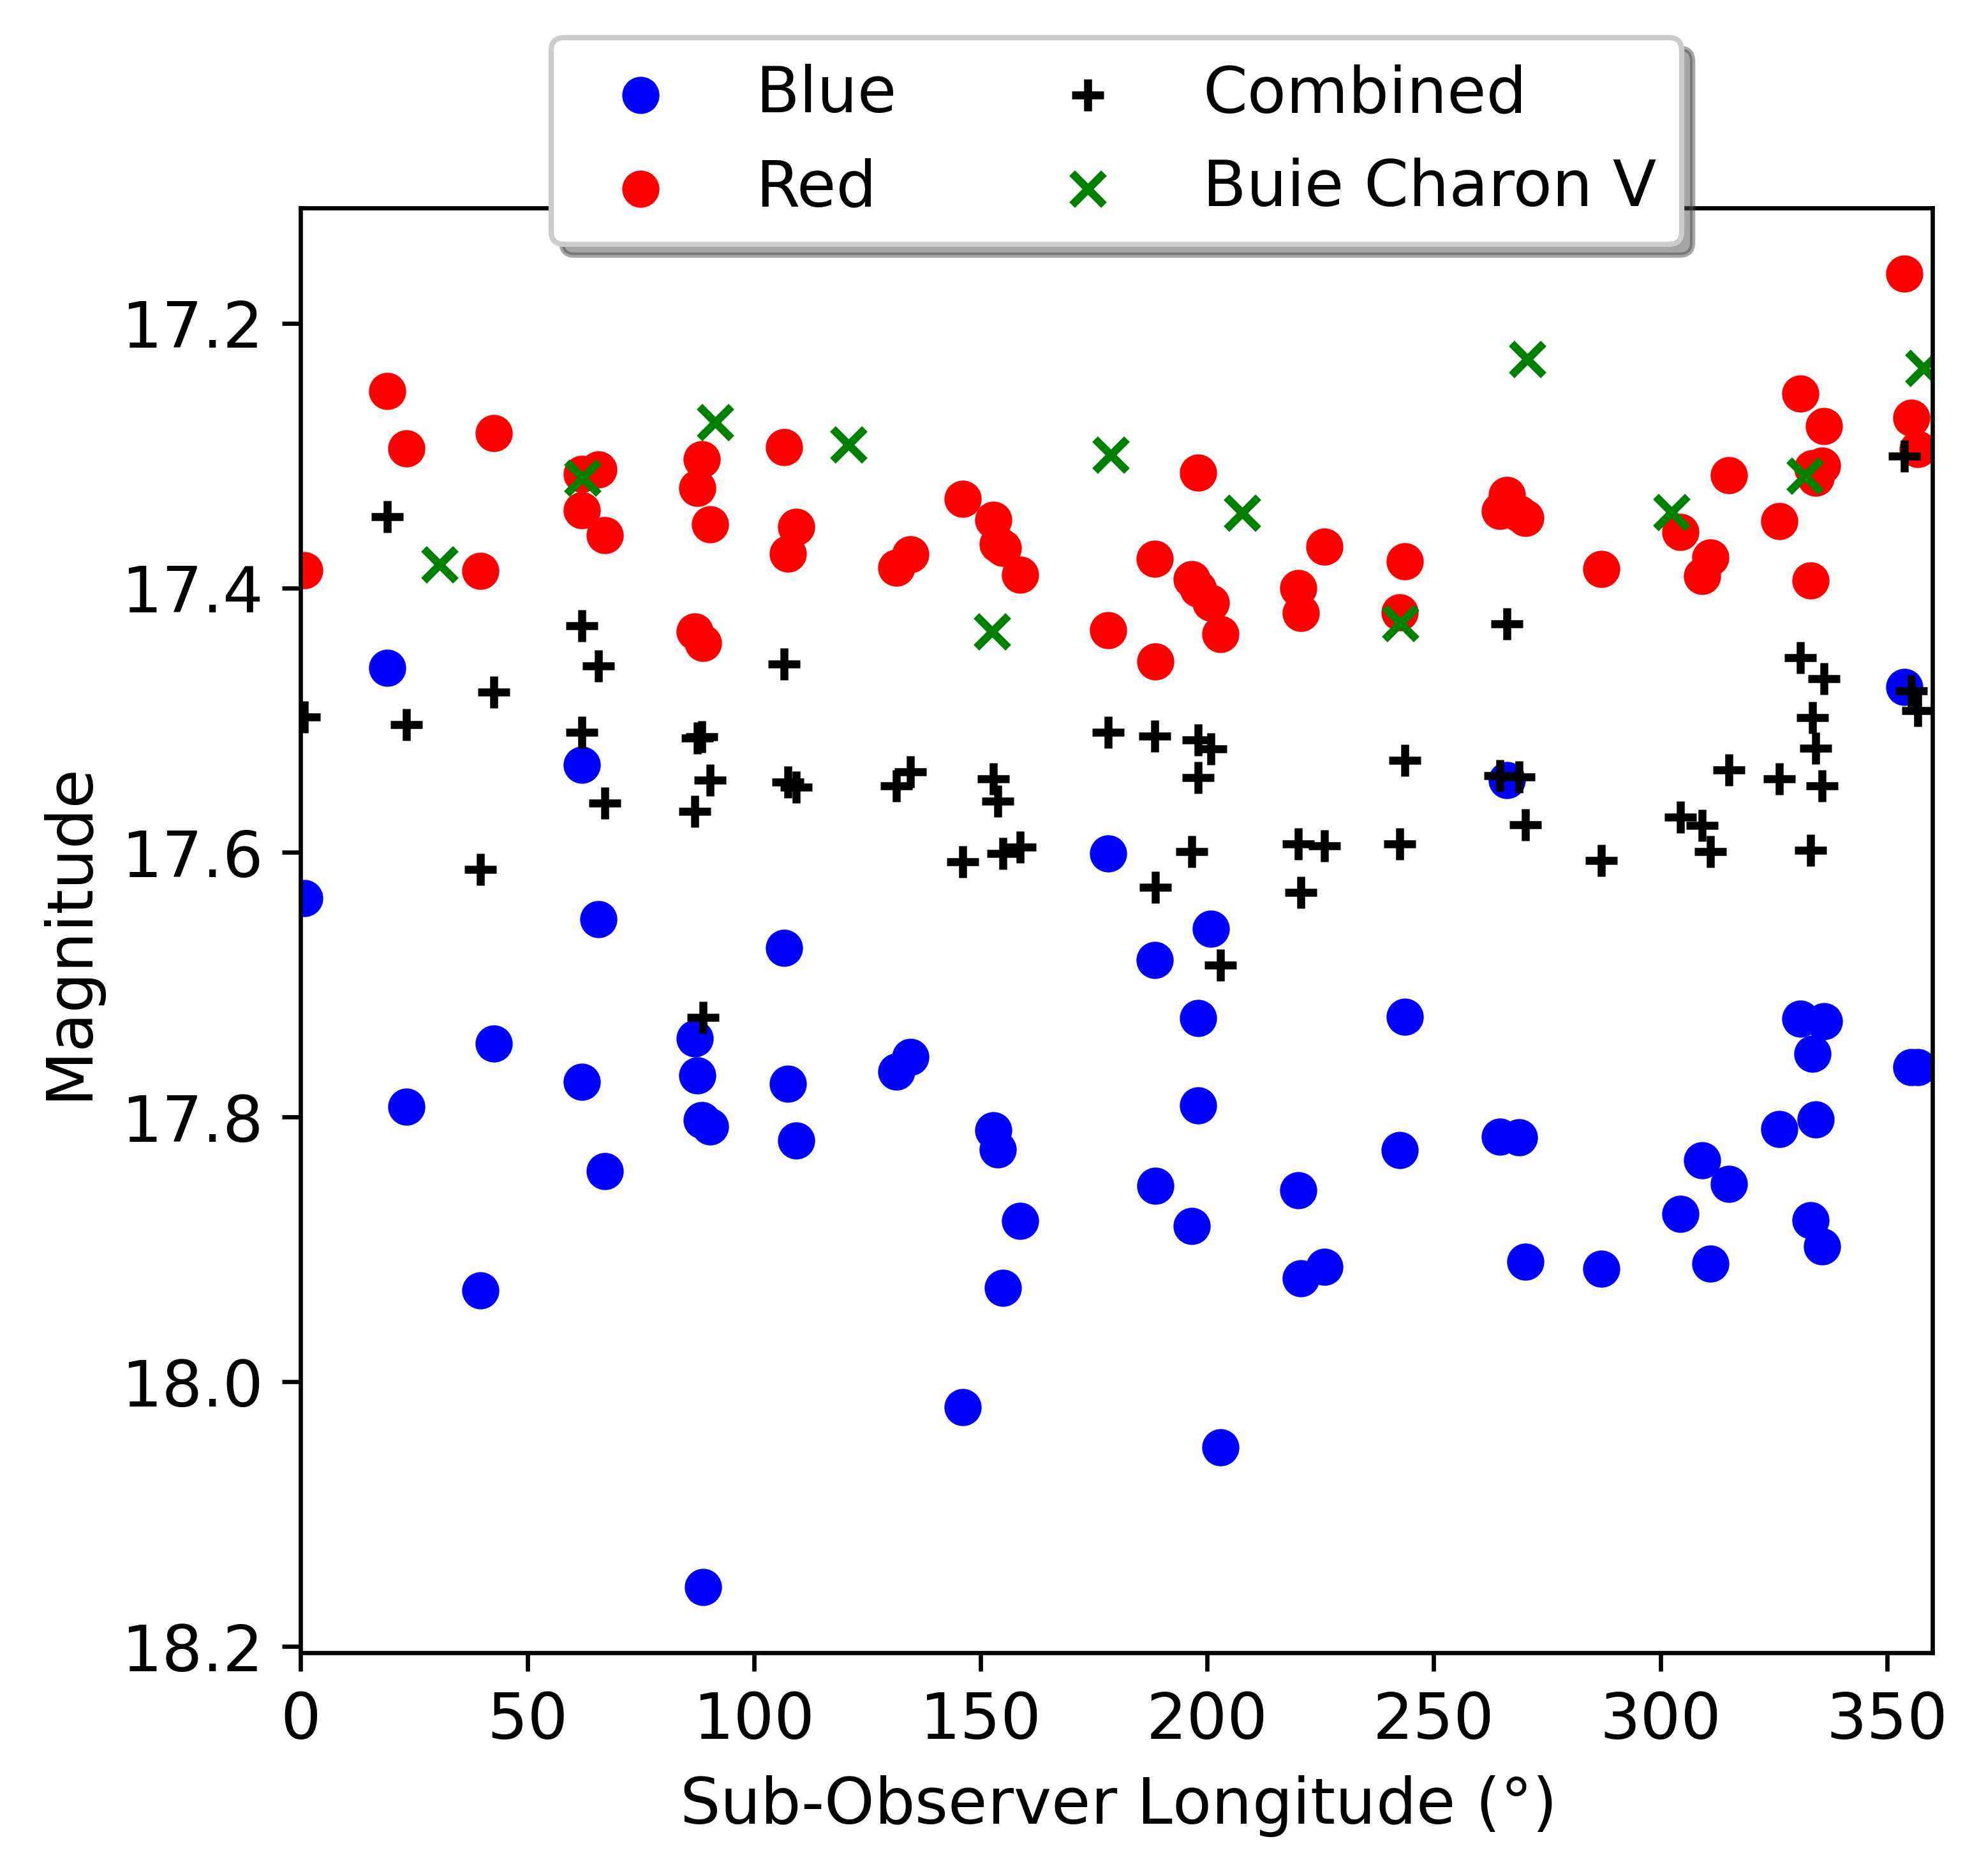

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of 

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_B

(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F4

(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 77 of 1907 bins contained negative fluxes; they have been set to zero.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


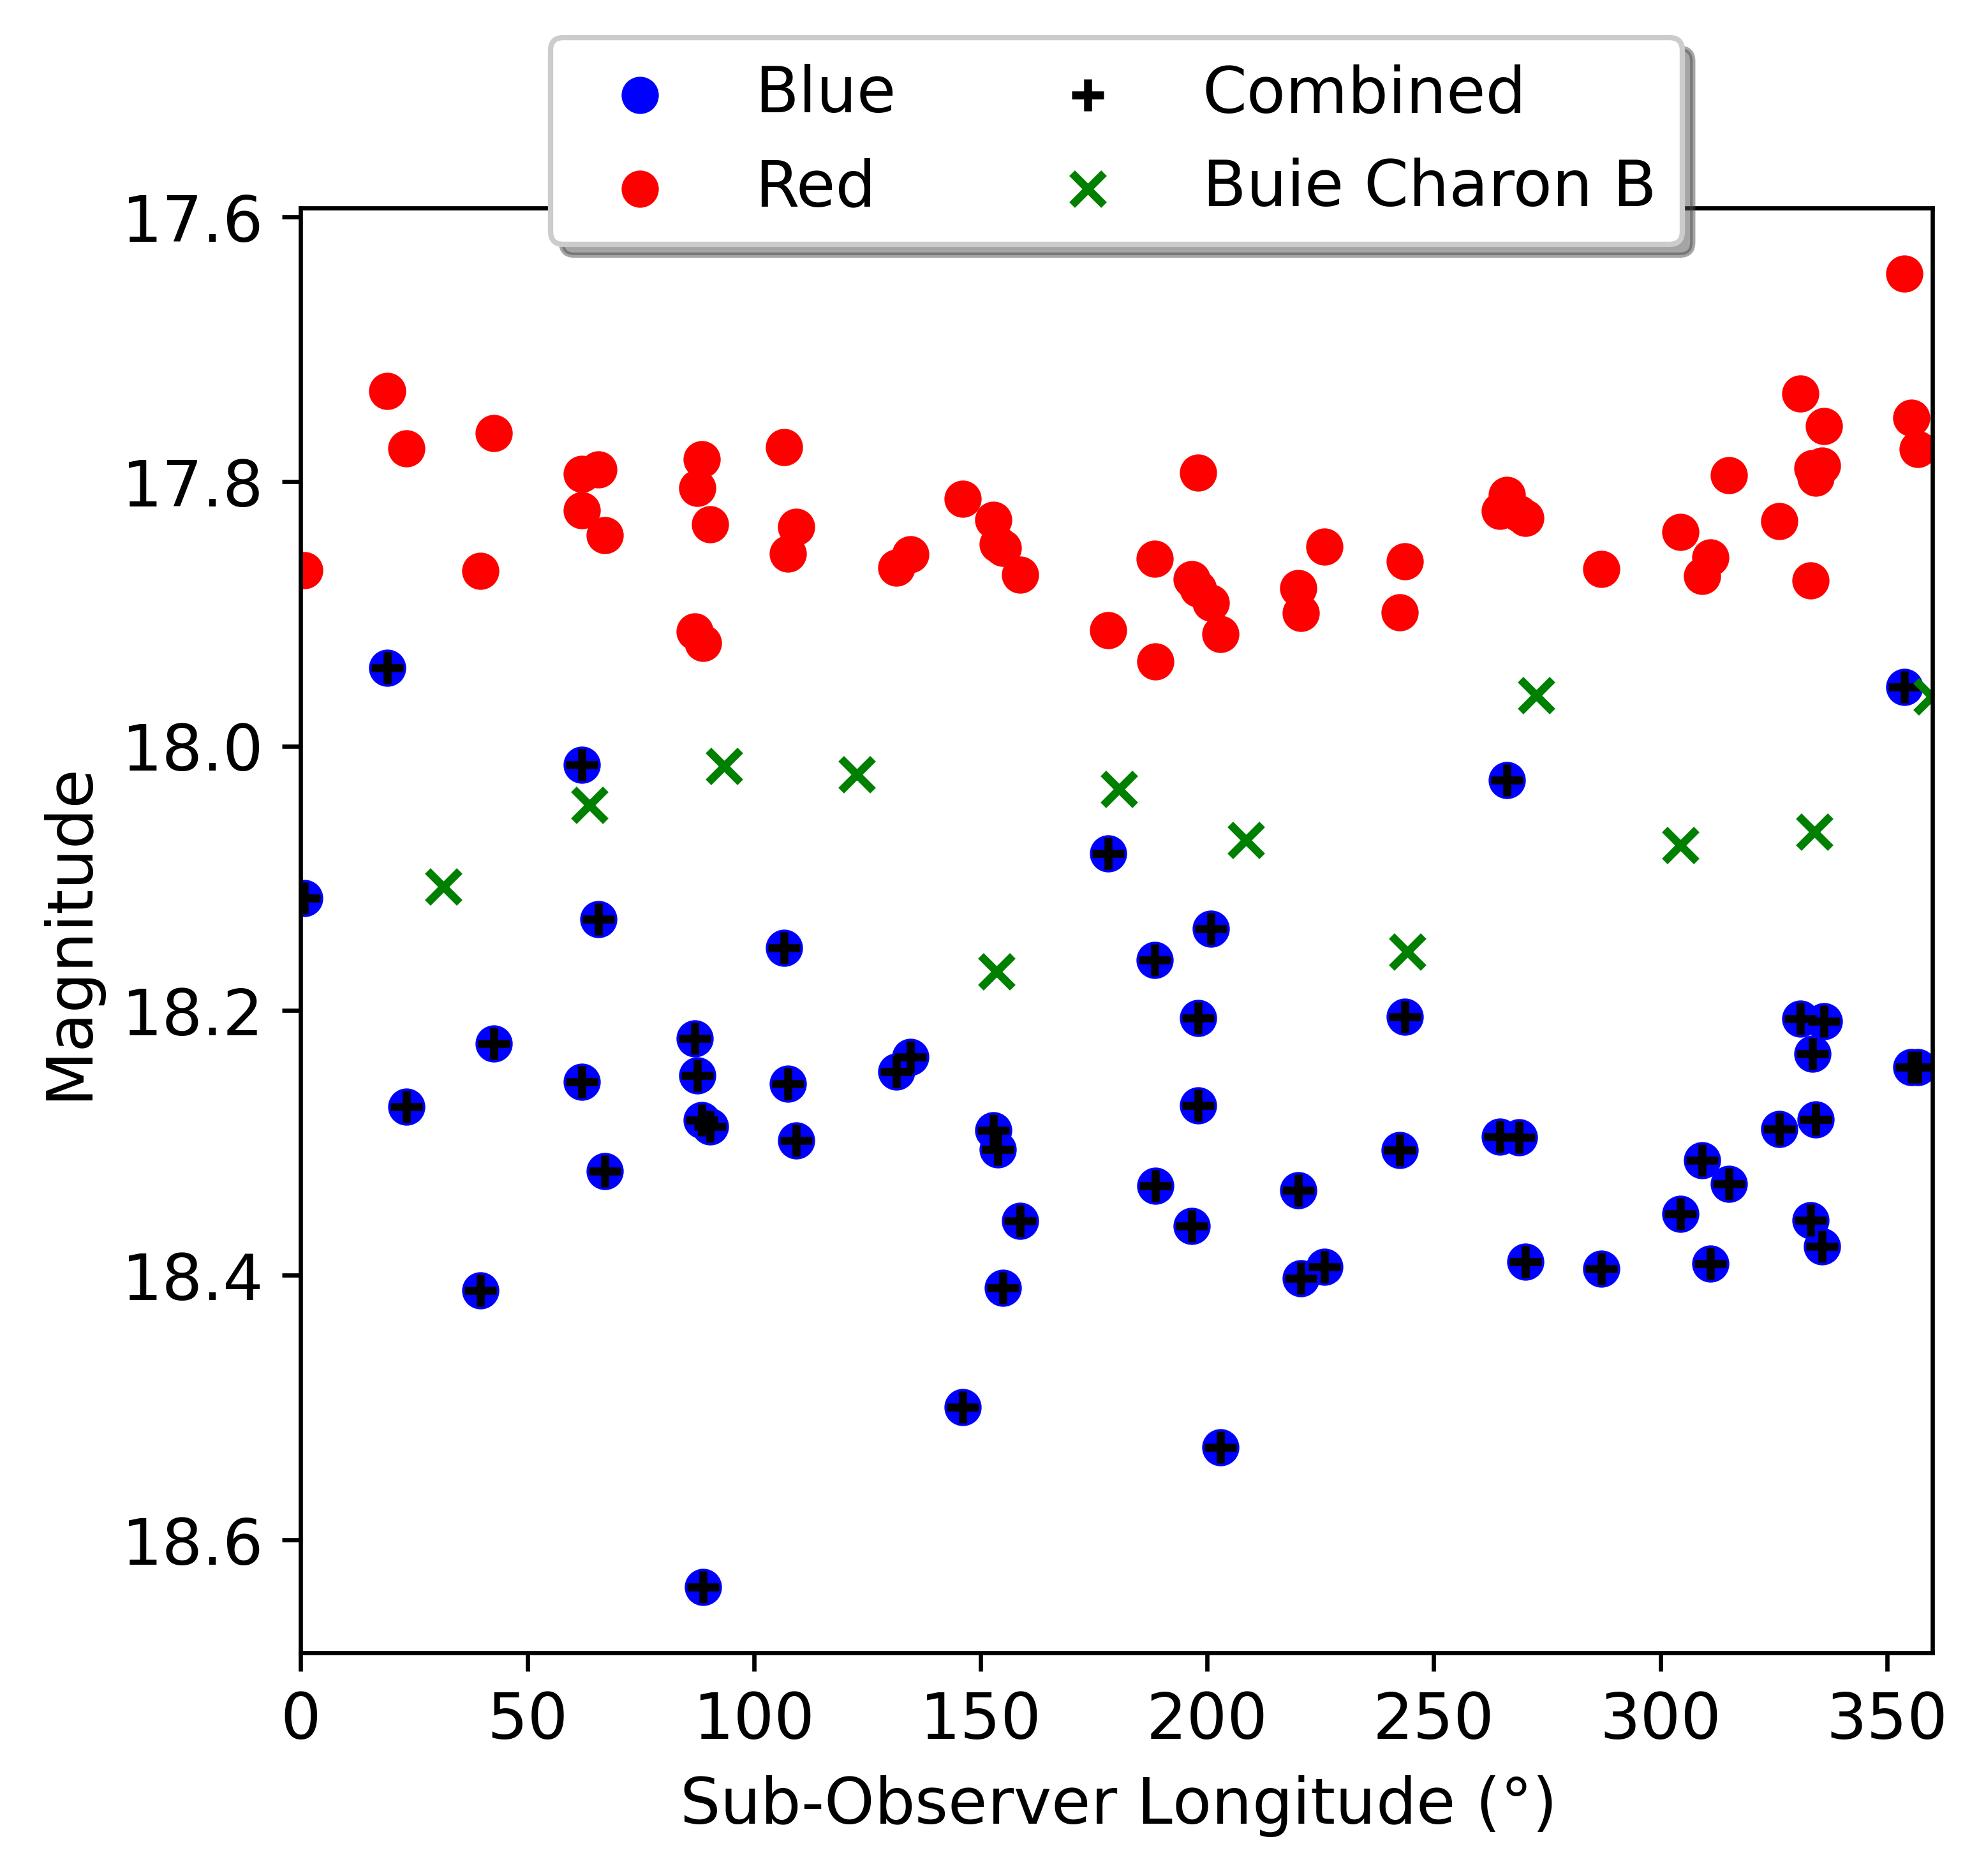

In [9]:
# 38.5 AU in km, as corrected in the Buie paper
BUIE_OBS_TO_TARGET = 5.760E9 
# 39.5 AU in km, as corrected in the Buie paper
BUIE_TARGET_TO_SUN = 5.909E9 
filters = ['NH_BLUE', 'NH_RED']
outputs = [
    ('pluto', 'HST_F555W'),
    ('pluto', 'HST_F435W'),
    ('charon', 'HST_F555W'),
    ('charon', 'HST_F435W'),
]

for target, output in outputs:
    fig, ax = plt.subplots(figsize=(5.5, 5))
    
    # Single conversions
    for f in filters:
        convert.plot_single_convert(
            fig, ax,
            target_name=target, 
            input_filter_name=f,
            output_filter_name=output, 
            output_obs_to_target=BUIE_OBS_TO_TARGET, 
            output_target_to_sun=BUIE_TARGET_TO_SUN, 
            x_axis='lon', y_axis='vegamag',
            c=utils.COLORMAP[f],
            label=utils.LABELMAP[f],
        )
    # Multi conversions
    convert.plot_multi_convert(
        fig, ax,
        target_name=target, 
        input_filter_names=filters,
        output_filter_name=output, 
        output_obs_to_target=BUIE_OBS_TO_TARGET,
        output_target_to_sun=BUIE_TARGET_TO_SUN, 
        x_axis='lon', y_axis='vegamag',
        c='black',
        label='Combined',
        marker='+'
    )

    buie_band = ('V' if output=='HST_F555W' else 'B')
    convert.plot_buie(
        fig, ax,
        target,
        buie_band, 
        marker='x',
        c='green',
    )

    # Show plot
    plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.14), shadow=True)

    ax.set_xlabel(r"Sub-Observer Longitude ($\degree$)")
    ax.set_ylabel(r"Magnitude")

    ax.set_xlim(0, 360)
    ax.invert_yaxis()

    plt.savefig(f"lightcurve_{target}_{output}.eps")
    plt.show()

In [10]:
# HD star
target = 'hd'
filters = ['NH_RED', 'NH_BLUE']
outputs = ['HST_F555W', 'HST_F435W']

obs = utils.get_observations(target, *filters)[0]

out_str = ""

for out in outputs:
    for f in filters:
        conv = convert.single_convert(
                spectrum=utils.get_spectrum(target),
                output_bandpass_name=out,
                pivot_wavelength=obs[f'{f}_pivot_wavelength'],
                calib_flux=obs[f'{f}_calib_flux'],
                input_obs_to_target=obs['obs_to_target'],
                input_target_to_sun=obs['sun_to_target'],
                output_obs_to_target=1,
                output_target_to_sun=1,
            )
        out_str += f"{utils.LABELMAP[out]} {utils.LABELMAP[f]} {conv.effstim('vegamag')}\n"
        
        
    pivot_wavelengths = {
        input_filter_name: obs[f'{input_filter_name}_pivot_wavelength']
        for input_filter_name in filters
    }
    fluxes = {
        input_filter_name: obs[f'{input_filter_name}_calib_flux']
        for input_filter_name in filters
    }
    conv = convert.multi_convert(
        spectrum=utils.get_spectrum(target),
        input_bandpass_names=filters,
        output_bandpass_name=out,
        pivot_wavelengths=pivot_wavelengths,
        calib_fluxes=fluxes,
        input_obs_to_target=obs['obs_to_target'],
        input_target_to_sun=obs['sun_to_target'],
        output_obs_to_target=1,
        output_target_to_sun=1,
    )
    out_str += f"{utils.LABELMAP[out]} Combined {conv.effstim('vegamag')}\n"


Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.
(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 185 of 4492 bins contained negative fluxes; they have been set to zero.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instea

In [11]:
print(out_str)

F555W Red 6.650334556113288
F555W Blue 6.643537496940478
F555W Combined 6.647194338714289
F435W Red 7.250806229362977
F435W Blue 7.244009170190168
F435W Combined 7.244009231985805



In [35]:
print(convert.get_full_data_table().to_latex(
    float_format=lambda x:f'{x:.4g}',
    bold_rows=True, 
    multicolumn_format='c',
))

\begin{tabular}{llllllll}
\toprule
       &           & \multicolumn{2}{l}{Counts} & \multicolumn{2}{l}{Flux} & \multicolumn{2}{l}{Transformed HST Magnitude} \\
       &           &       Red &  Blue &       Red &      Blue &                     F555W & F435W \\
\midrule
\textbf{Pluto} & \textbf{290860857} &     477.8 & 99.06 &  1.02e-11 & 8.119e-12 &                     15.34 & 16.34 \\
       & \textbf{291114237} &     474.2 & 95.33 & 1.016e-11 & 7.839e-12 &                     15.43 & 16.44 \\
       & \textbf{291201837} &     515.2 & 97.98 & 1.111e-11 & 8.109e-12 &                     15.38 & 16.43 \\
       & \textbf{291267597} &     523.5 & 106.4 & 1.117e-11 &  8.72e-12 &                     15.36 & 16.37 \\
       & \textbf{291308097} &     561.3 & 117.2 & 1.201e-11 & 9.631e-12 &                     15.28 & 16.27 \\
       & \textbf{291374037} &     563.6 & 111.7 & 1.208e-11 & 9.186e-12 &                     15.32 & 16.34 \\
       & \textbf{291440517} &     523.6 & 102.9 & 1.11